# ML 연습07- Model 평가

## data 불러오기

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
data=pd.read_csv("Fvote.csv")

## data set 준비하기

In [36]:
from sklearn.model_selection import train_test_split
x=data[data.columns[1:13]]
y=data[['vote']]
x_train,x_test,y_train,y_test= train_test_split(x,y,stratify=y,random_state=42)

## LogisticRegression setup

### C=10 적용

In [37]:
from sklearn.linear_model import LogisticRegression
Final_model=LogisticRegression(C=10)#최적화된 파라미터 선택
Final_model.fit(x_train,y_train)

LogisticRegression(C=10)

### Score 확인

#### train 모델 확인

In [38]:
pred_train=Final_model.predict(x_train)
Final_model.score(x_train,y_train)

0.740506329113924

#### test 모델 확인

In [39]:
pred_test=Final_model.predict(x_test)
Final_model.score(x_test,y_test)

0.6792452830188679

### 혼돈행렬로 확인

#### train data

In [40]:
from sklearn.metrics import confusion_matrix
confusion_train=confusion_matrix(y_train,pred_train)
confusion_train

array([[ 12,  34],
       [  7, 105]], dtype=int64)

#### test data

In [41]:
confusion_test=confusion_matrix(y_test,pred_test)
confusion_test

array([[ 3, 12],
       [ 5, 33]], dtype=int64)

### Classification Report 확인

#### train data

In [42]:
from sklearn.metrics import classification_report
cfreport_train=classification_report(y_train,pred_train)
print(cfreport_train)

              precision    recall  f1-score   support

           0       0.63      0.26      0.37        46
           1       0.76      0.94      0.84       112

    accuracy                           0.74       158
   macro avg       0.69      0.60      0.60       158
weighted avg       0.72      0.74      0.70       158



#### test data

In [43]:
cfreport_test=classification_report(y_test,pred_test)
print(cfreport_test)

              precision    recall  f1-score   support

           0       0.38      0.20      0.26        15
           1       0.73      0.87      0.80        38

    accuracy                           0.68        53
   macro avg       0.55      0.53      0.53        53
weighted avg       0.63      0.68      0.64        53



### ROC 계산

In [44]:
from sklearn.metrics import roc_curve,auc

In [45]:
from sklearn import metrics

In [46]:
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,Final_model.decision_function(x_test))
roc_auc=metrics.roc_auc_score(y_test,Final_model.decision_function(x_test))
roc_auc

0.6350877192982456

In [47]:
len(Final_model.decision_function(x_train))

158

In [48]:
Final_model.decision_function(x_train)

array([ 0.01067483,  0.75885458,  0.5847745 ,  0.89989524,  2.27848352,
        1.46645451,  0.36275195,  1.2658006 ,  3.08614567,  1.75417949,
        0.45199206,  1.65691735,  1.66599092,  0.71328705,  2.65992901,
        0.69758127,  1.43113591,  2.31655185,  0.69092583,  0.18506315,
        1.65519946,  0.46663963, -0.39422543,  0.6900235 ,  0.15180685,
        1.99887472,  0.79071784,  0.9345275 , -1.77289643,  0.86224506,
        0.69092583,  0.68175526,  2.20230679,  1.72098382,  1.76423561,
        0.76268067,  0.75442267,  2.77133997,  2.17656353,  1.6643415 ,
       -0.72377447,  1.05068497,  0.72906314,  2.19654556,  1.55902402,
        1.72726064,  0.17739795,  1.41881393,  1.49053567,  0.56623712,
        1.63904711,  0.72360614,  2.34639418,  0.90155894,  2.47174697,
        3.27867245,  0.50708532, -0.46989293,  0.78934488,  0.45680766,
        2.28739439,  0.48307644, -1.21737052,  1.21173219,  1.51272272,
        0.87575889,  1.95679622,  1.45398264,  2.28796423,  1.70

In [49]:
len(Final_model.decision_function(x_test))

53

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

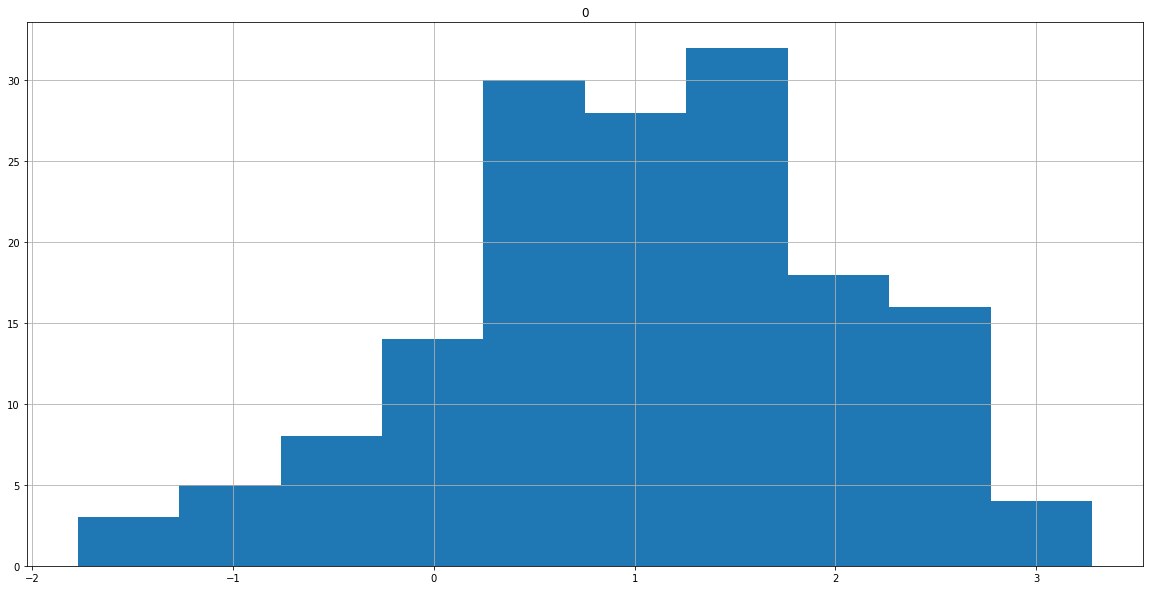

In [50]:
pd.DataFrame(Final_model.decision_function(x_train)).hist(figsize=(20,10))

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

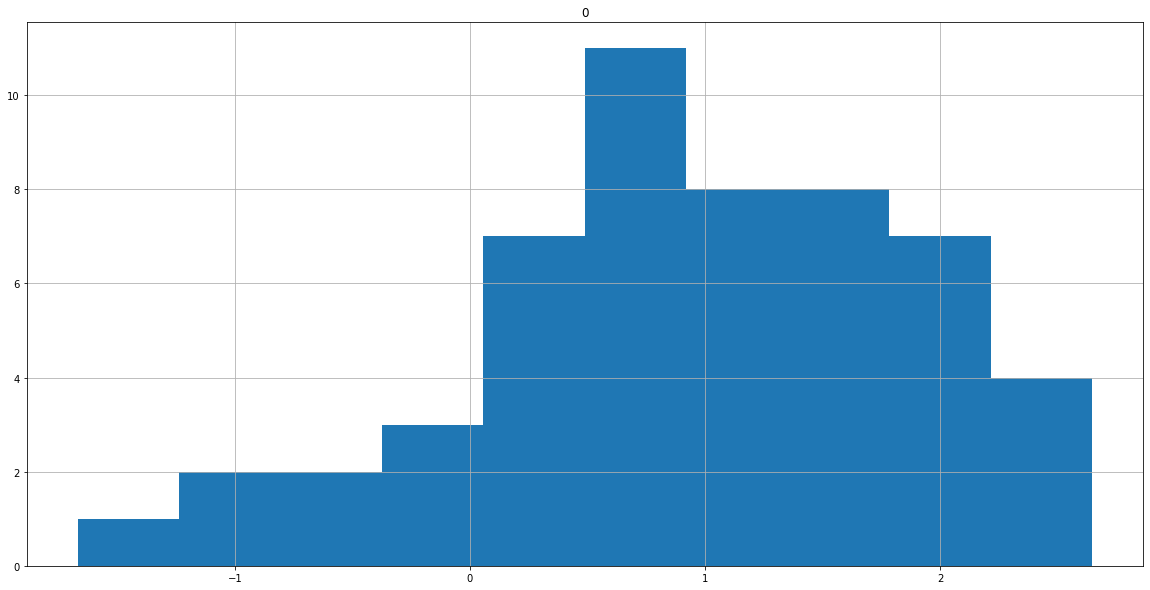

In [51]:
pd.DataFrame(Final_model.decision_function(x_test)).hist(figsize=(20,10))

In [25]:
Final_model.decision_function(x_test)

array([-0.31564008,  0.89562767, -0.28384479,  1.51907504,  0.74396272,
        1.08609428,  1.50059817, -0.975341  ,  0.41542458,  0.37459326,
        2.00554285,  1.65724827,  1.21406899,  0.45838351,  2.07675108,
        0.2593796 ,  1.36123111, -1.05070778, -0.3838691 ,  0.96370611,
        1.56748015,  0.64387309,  1.13559455,  1.39820948,  0.53818501,
        1.95484036, -0.67749256,  1.54902244,  0.87682118,  0.38523196,
        2.3628659 ,  2.5086729 ,  0.68909568,  1.18754085,  1.82078967,
        1.7980276 ,  2.65061453,  1.02709758,  0.73511329, -0.34759077,
        1.2181155 ,  0.89055455,  0.48273689,  1.26497036,  2.18766284,
        0.89216206,  2.29506949,  0.70881659,  0.09130434,  0.77338113,
       -1.67027792,  2.20047539,  1.48839347])

### ROC Curve

In [20]:
import matplotlib.pyplot as plt

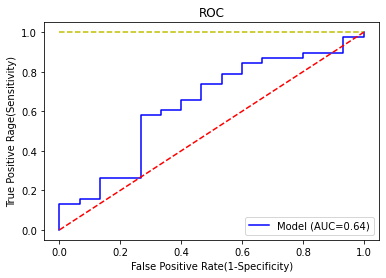

In [24]:
plt.title("ROC")
plt.xlabel("False Positive Rate(1-Specificity)")
plt.ylabel("True Positive Rage(Sensitivity)")
plt.plot(false_positive_rate,true_positive_rate,"b",label="Model (AUC=%0.2f)"% roc_auc)
plt.plot([0,1],[1,1],"y--")
plt.plot([0,1],[0,1],"r--")

plt.legend(loc="lower right")
plt.show()